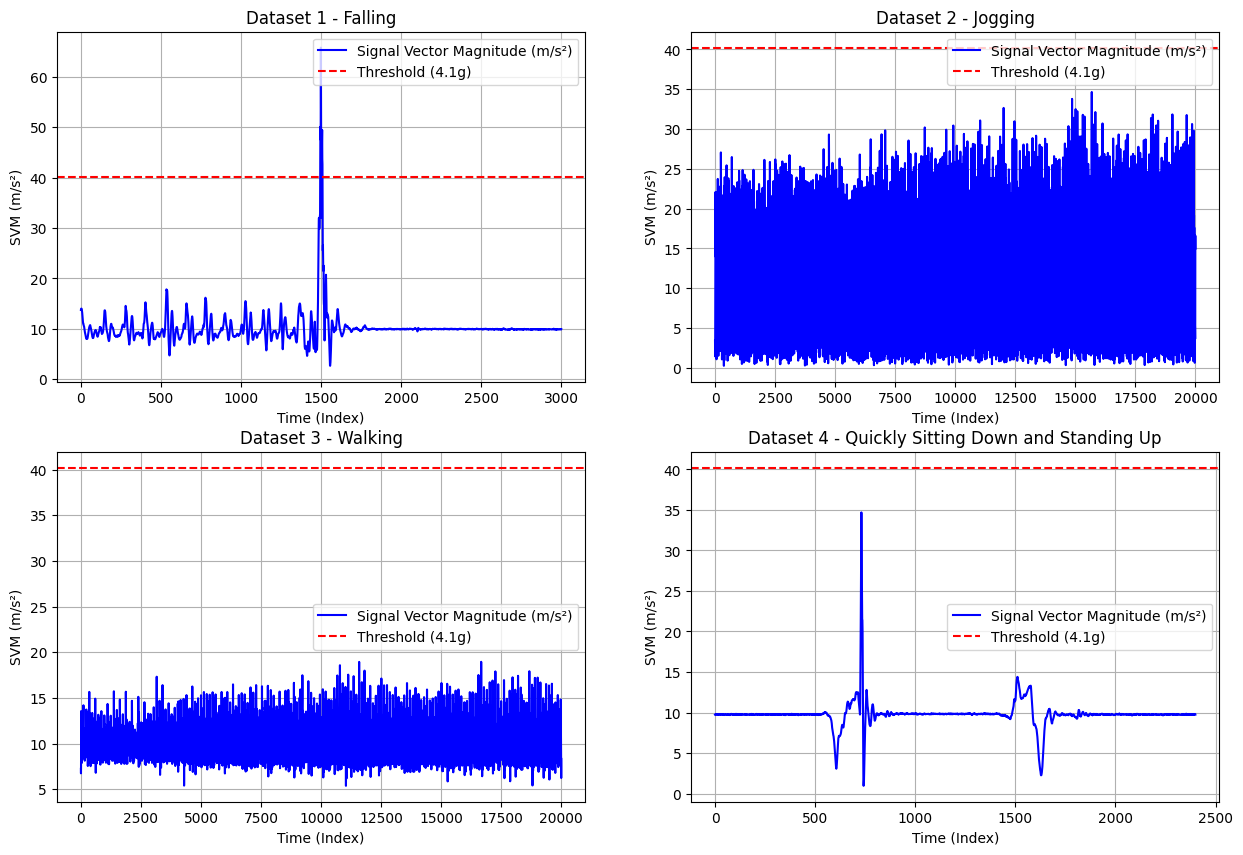

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_acceleration_data(file_path):
    # Read the file
    df_full = pd.read_csv(file_path, delimiter=',', header=None, engine='python')
    
    # Clean data and select acceleration columns
    df_full = df_full.apply(lambda x: x.str.replace(';', '').astype(float) if x.dtype == 'object' else x)
    df_acceleration = df_full.iloc[:, -3:]  # Select the last three columns
    
    # Convert counts to g's
    df_acceleration = (df_acceleration / 8192) * 8
    df_acceleration.columns = ['X_g', 'Y_g', 'Z_g']
    
    # Convert g's to m/s²
    df_acceleration_m_s2 = df_acceleration * 9.81
    df_acceleration_m_s2.columns = ['X_m/s²', 'Y_m/s²', 'Z_m/s²']
    
    # Calculate the SVM
    df_acceleration_m_s2['SVM'] = calculate_svm(df_acceleration_m_s2, columns=['X_m/s²', 'Y_m/s²', 'Z_m/s²'])
    
    return df_acceleration_m_s2

def calculate_svm(df, columns=('X_g', 'Y_g', 'Z_g')):
    acc_data = df[list(columns)]
    svm = np.sqrt((acc_data**2).sum(axis=1))
    return svm

# List of dataset file paths
file_paths = [
    '/Users/lixingmin/Warp-firmware/data/Fall_data.csv',
    '/Users/lixingmin/Warp-firmware/data/jogging_data.csv',
    '/Users/lixingmin/Warp-firmware/data/walking_data.csv',
    '/Users/lixingmin/Warp-firmware/data/quickly_sit.csv'
]

# Create a single figure for all plots
plt.figure(figsize=[15, 10])  # Adjust size as necessary

# Define your titles
titles = [
    'Dataset 1 - Falling',
    'Dataset 2 - Jogging',
    'Dataset 3 - Walking',
    'Dataset 4 - Quickly Sitting Down and Standing Up'
]

# Modify this part of the code to use the predefined titles
for i, file_path in enumerate(file_paths, start=1):
    df_acceleration_m_s2 = process_acceleration_data(file_path)
    
    # Use predefined title from the list
    title = titles[i - 1]  # Adjust based on the titles list
    
    # Create subplot in 2x2 format
    plt.subplot(2, 2, i) 
    plt.plot(df_acceleration_m_s2['SVM'], label='Signal Vector Magnitude (m/s²)', color='blue')
    plt.axhline(y=4.1 * 9.81, color='red', linestyle='--', label='Threshold (4.1g)')
    plt.legend()
    plt.xlabel('Time (Index)')
    plt.ylabel('SVM (m/s²)')
    plt.title(title)  # Use the predefined title
    plt.grid(True)


